<a href="https://colab.research.google.com/github/nitisha-pradhan/The_Irregulars/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,625 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import re

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PanCard/pan38.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

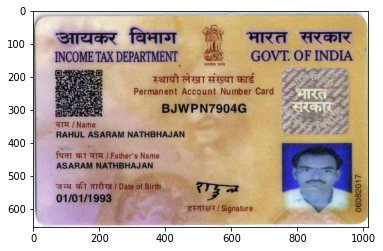

In [ ]:
plt.imshow(img)

In [ ]:
th, threshold = cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)

In [ ]:
result = pytesseract.image_to_string((threshold), lang='eng')

In [ ]:
pan_ocr = {}

In [ ]:
from google.colab.patches import cv2_imshow

['1', '1', '0', '0', '0', '0', '0', '0', '1014', '654', '-1']
['2', '1', '1', '0', '0', '0', '67', '50', '903', '106', '-1']
['3', '1', '1', '1', '0', '0', '67', '50', '903', '106', '-1']
['4', '1', '1', '1', '1', '0', '69', '50', '896', '53', '-1']
['5', '1', '1', '1', '1', '1', '69', '66', '186', '37', '21', 'Sree']
['5', '1', '1', '1', '1', '2', '291', '50', '144', '50', '10', 'fart']
['5', '1', '1', '1', '1', '3', '646', '63', '125', '37', '0', 'AR']
['5', '1', '1', '1', '1', '4', '806', '63', '159', '37', '28', 'Gat']
['4', '1', '1', '1', '2', '0', '67', '118', '903', '38', '-1']
['5', '1', '1', '1', '2', '1', '67', '122', '117', '72', '74', 'INCOME']
['5', '1', '1', '1', '2', '2', '189', '122', '55', '72', '74', 'TAX']
['5', '1', '1', '1', '2', '3', '252', '121', '195', '47', '79', 'DEPARTMENT,']
['5', '1', '1', '1', '2', '4', '660', '119', '117', '34', '92', 'GOVT.']
['5', '1', '1', '1', '2', '5', '790', '118', '52', '34', '94', 'OF']
['5', '1', '1', '1', '2', '6', '852', '119',

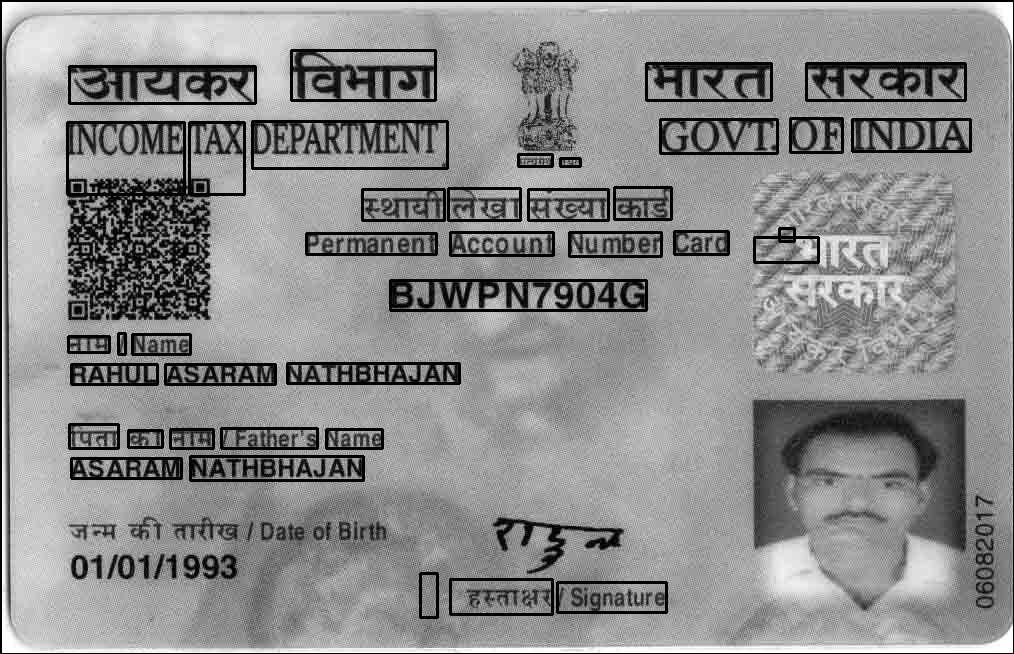

In [ ]:
hImg,wImg= gray.shape
boxes = pytesseract.image_to_data(gray)
list1 = []
for x,b in enumerate(boxes.splitlines()):
  if x!=0:
    b = b.split()
    print(b)
    list1.append(b)
    if len(b)==12:
      x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
      cv2.rectangle(gray,(x,y),(w+x,h+y),(0,0,255),2)



cv2_imshow(gray)
      


In [ ]:
words = []
for i in range(len(list1)):
  if(len(list1[i])==12):
    words.append(list1[i])

In [ ]:
for i in range(len(words)):
  if(len(words[i][11])==10 and (any(chr.isalpha() for chr in words[i][11]) and any(chr.isdigit() for chr in words[i][11]))):
    pan_ocr['PanNo.']= words[i][11]

In [ ]:
name = []
for i in range(1,len(words)):
  name.append(words[i][11])
for i in range(len(name)):
  if(name[i]=='/Name' or name[i]=='Name'):
    pan_ocr['FirstName']=name[i+1]+' '+name[i+2]+' '+name[i+3]
    break
idx = len(name) - 1 - name[::-1].index('Name')
pan_ocr['FatherName']=name[idx+1]+' '+name[idx+2]


In [ ]:
date_pattern = r'(0[1-9]|[12][0-9]|3[01])[/](0[1-9]|1[012])[/](19|20)\d\d'
date = re.search(date_pattern, result).group()
pan_ocr['dob'] = date
print(date)

01/01/1993


In [ ]:
pan_ocr

{'FatherName': 'ASARAM NATHBHAJAN',
 'FirstName': 'RAHUL ASARAM NATHBHAJAN',
 'PanNo.': 'BJWPN7904G',
 'dob': '01/01/1993'}

In [ ]:
if 

In [ ]:
name

['fart',
 'AR',
 'Gat',
 'INCOME',
 'TAX',
 'DEPARTMENT,',
 'GOVT.',
 'OF',
 'INDIA',
 'eres',
 'aT',
 'VAT',
 'HS',
 'A',
 'Permanent',
 'Account',
 'Number',
 'Card',
 '‘%*',
 'BJWPN7904G',
 'eter',
 '3a',
 'ata',
 '/',
 'Name',
 'RAHUL',
 'ASARAM',
 'NATHBHAJAN',
 'frat',
 '&1',
 'ATH',
 '/',
 "Father's",
 'Name',
 'ASARAM',
 'NATHBHAJAN',
 ']',
 '--EFAAT/',
 'Signature']

In [ ]:
for e in range(len(name)):
  if(name[e]=="GOVT." and name[e+1]=="OF" and name[e+2]=="INDIA"):
    print("User is legit")

User is legit
